# End-to-End Twitter Turkish Sentiment Analysis Application
## 1-Download Data


### Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/morethan101

data  docs  morethan101_twitter_app.pptx  notebooks


In [3]:
import os
os.chdir('/content/drive/MyDrive/morethan101/')

In [4]:
!ls

data  docs  morethan101_twitter_app.pptx  notebooks


### Install Packages

In [ ]:
!pip3 install snscrape
#!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

### Import Packages

In [6]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import timedelta
from os import mkdir, path
import os

### Twitter Search by Hashtag 

In [7]:
def twint_search_new_hastag(searchterm_, since_, until_, lang_='tr', limit=10000):
  #query = f"(#{searchterm_}) lang:{lang_} since:{since_} until:{until_}"
  query = f"({searchterm_}) lang:{lang_} since:{since_} until:{until_}"

  #query = (#deprem) lang:tr since:2023-02-06 until:2023-02-07
  #chatgpt until:2022-12-30 since:2022-11-30 lang:tr
  tweets = []
  limit = limit

  print(query)

  q = sntwitter.TwitterSearchScraper(query)
  for tweet in q.get_items():
    #print(tweet.content)
    #break

    if len(tweets) == limit:
      break
    else:
      tweets.append([tweet.id, tweet.date, tweet.username, tweet.content, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.url])
          
  df = pd.DataFrame(tweets, columns=['ID', 'Date', 'Username', 'Tweet', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'URL'])

  csv_name = "data/" + searchterm_.replace("#","hastag_").replace("\"","").replace(" ","_") + "_" + str(since_) + "_" + str(until_)  + ".csv"

  df.to_csv(csv_name, index=False)

  print("succecss")

### Twitter Search by Username 

In [8]:
def twint_search_from_username(username_, since_, until_, lang_='tr', limit=10000):
  #query = searchterm + ' lang:en until:' + until + 'since:' + since
  query = f"(from:{username_}) until:{until_} since:{since_}"
  #(from:01CoinTeam) until:2022-09-24 since:2022-09-14


  tweets = []
  limit = limit

  q = sntwitter.TwitterSearchScraper(query)
  for tweet in q.get_items():
    #print(tweet.content)
    #break
    print(type(tweet))

    if len(tweets) == limit:
      break
    else:
      tweets.append([tweet.id, tweet.date, tweet.username, tweet.content, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.url])
          
  df = pd.DataFrame(tweets, columns=['ID', 'Date', 'Username', 'Tweet', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'URL'])

  csv_name = "data/" + username_.replace("#","hastag_").replace("\"","").replace(" ","_") + "_" + str(since_) + "_" + str(until_)  + ".csv"

  df.to_csv(csv_name, index=False)

  print("succecss")

### DOWNLOAD SEARCH DATA

In [10]:
#dt_since = "2023-02-06"
#dt_until = "2023-02-07"
#search_hashtag = "#deprem"

dt_since = "2022-11-30"
dt_until = "2022-12-30"
search_hashtag = "chatgpt"

twint_search_new_hastag(search_hashtag, dt_since, dt_until, lang_='tr', limit=100000)

(chatgpt) lang:tr since:2022-11-30 until:2022-12-30


<ipython-input-8-4e7e183266f5>:20: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.id, tweet.date, tweet.username, tweet.content, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.url])
<ipython-input-8-4e7e183266f5>:20: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.id, tweet.date, tweet.username, tweet.content, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.url])


succecss


### CSV TO DATAFRAME

In [9]:
!ls "data/"

chatgpt_2022-11-30_2022-12-30.csv  deprem  stopwords_tr.txt


In [10]:
path_to_csv = "data/"
csv_files = [pos_csv for pos_csv in os.listdir(path_to_csv) if pos_csv.endswith('.csv')]
csv_files

['chatgpt_2022-11-30_2022-12-30.csv']

In [13]:
dfs = []
for index, js in enumerate(csv_files):
  file_path = os.path.join(path_to_csv, js)
  print(file_path)
  data = pd.read_csv(file_path, encoding='utf-8', engine='python')
  dfs.append(data)


df = pd.concat(dfs, ignore_index=True)

data/chatgpt_2022-11-30_2022-12-30.csv


In [14]:
#df = pd.read_csv("data/chatgpt_2022-11-30_2022-12-30.csv", encoding='utf-8', engine='python')

In [15]:
df

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,URL
0,1608613358500220928,2022-12-29 23:58:05+00:00,ademmcansiz,ChatGPT ile vs atıyoruz olmuyor diyom hala anl...,0,0,3,0,https://twitter.com/ademmcansiz/status/1608613...
1,1608585229756936192,2022-12-29 22:06:19+00:00,berkelevent,ChatGPT çıktı çıkalı Co-pilot’u da unuttuk..,0,0,0,0,https://twitter.com/berkelevent/status/1608585...
2,1608581500060205057,2022-12-29 21:51:30+00:00,0xugurcaneser,Her türlü yazı işlerimi chatgpt yapıyor sağols...,0,0,0,0,https://twitter.com/0xugurcaneser/status/16085...
3,1608580588247871488,2022-12-29 21:47:52+00:00,atiorh,@imTolstoyevski 2019 Haziran bölümlerinde yapa...,0,1,0,0,https://twitter.com/atiorh/status/160858058824...
4,1608579005657272320,2022-12-29 21:41:35+00:00,nounpackage,Ben en güzel Siber Güvenlik muhabbetini ChatGP...,0,0,0,0,https://twitter.com/nounpackage/status/1608579...
...,...,...,...,...,...,...,...,...,...
5584,1598294973857792000,2022-12-01 12:36:31+00:00,DigitalReportTR,OpenAI’ın yeni chat robotu ChatGPT tanıtıldı\n...,0,1,1,0,https://twitter.com/DigitalReportTR/status/159...
5585,1598294149585047558,2022-12-01 12:33:14+00:00,venividi_trade,Yapay zeka üzerine araştırmalar yapan @OpenAI ...,5,3,14,1,https://twitter.com/venividi_trade/status/1598...
5586,1598293316843737088,2022-12-01 12:29:56+00:00,yigitkonur,Bugün mutlu musunuz? Biraz daha depresif hisse...,10,24,319,7,https://twitter.com/yigitkonur/status/15982933...
5587,1598288040052502528,2022-12-01 12:08:58+00:00,kisalar,Öykülerin tam da oturmuyor olmasının sebebi be...,1,0,0,0,https://twitter.com/kisalar/status/15982880400...


In [16]:
df[(df["Date"].str.contains('\\d', regex=True))]

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,URL
0,1608613358500220928,2022-12-29 23:58:05+00:00,ademmcansiz,ChatGPT ile vs atıyoruz olmuyor diyom hala anl...,0,0,3,0,https://twitter.com/ademmcansiz/status/1608613...
1,1608585229756936192,2022-12-29 22:06:19+00:00,berkelevent,ChatGPT çıktı çıkalı Co-pilot’u da unuttuk..,0,0,0,0,https://twitter.com/berkelevent/status/1608585...
2,1608581500060205057,2022-12-29 21:51:30+00:00,0xugurcaneser,Her türlü yazı işlerimi chatgpt yapıyor sağols...,0,0,0,0,https://twitter.com/0xugurcaneser/status/16085...
3,1608580588247871488,2022-12-29 21:47:52+00:00,atiorh,@imTolstoyevski 2019 Haziran bölümlerinde yapa...,0,1,0,0,https://twitter.com/atiorh/status/160858058824...
4,1608579005657272320,2022-12-29 21:41:35+00:00,nounpackage,Ben en güzel Siber Güvenlik muhabbetini ChatGP...,0,0,0,0,https://twitter.com/nounpackage/status/1608579...
...,...,...,...,...,...,...,...,...,...
5584,1598294973857792000,2022-12-01 12:36:31+00:00,DigitalReportTR,OpenAI’ın yeni chat robotu ChatGPT tanıtıldı\n...,0,1,1,0,https://twitter.com/DigitalReportTR/status/159...
5585,1598294149585047558,2022-12-01 12:33:14+00:00,venividi_trade,Yapay zeka üzerine araştırmalar yapan @OpenAI ...,5,3,14,1,https://twitter.com/venividi_trade/status/1598...
5586,1598293316843737088,2022-12-01 12:29:56+00:00,yigitkonur,Bugün mutlu musunuz? Biraz daha depresif hisse...,10,24,319,7,https://twitter.com/yigitkonur/status/15982933...
5587,1598288040052502528,2022-12-01 12:08:58+00:00,kisalar,Öykülerin tam da oturmuyor olmasının sebebi be...,1,0,0,0,https://twitter.com/kisalar/status/15982880400...


In [19]:
#df = df[~(df["Date"].str.contains('http', case=False))]
#df = df[~(df["Date"].str.contains('#', case=False))]
#df = df[(df["Date"].str.contains('\\d', regex=True))]

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,URL
0,1608613358500220928,2022-12-29 23:58:05+00:00,ademmcansiz,ChatGPT ile vs atıyoruz olmuyor diyom hala anl...,0,0,3,0,https://twitter.com/ademmcansiz/status/1608613...
1,1608585229756936192,2022-12-29 22:06:19+00:00,berkelevent,ChatGPT çıktı çıkalı Co-pilot’u da unuttuk..,0,0,0,0,https://twitter.com/berkelevent/status/1608585...
2,1608581500060205057,2022-12-29 21:51:30+00:00,0xugurcaneser,Her türlü yazı işlerimi chatgpt yapıyor sağols...,0,0,0,0,https://twitter.com/0xugurcaneser/status/16085...
3,1608580588247871488,2022-12-29 21:47:52+00:00,atiorh,@imTolstoyevski 2019 Haziran bölümlerinde yapa...,0,1,0,0,https://twitter.com/atiorh/status/160858058824...
4,1608579005657272320,2022-12-29 21:41:35+00:00,nounpackage,Ben en güzel Siber Güvenlik muhabbetini ChatGP...,0,0,0,0,https://twitter.com/nounpackage/status/1608579...
...,...,...,...,...,...,...,...,...,...
5584,1598294973857792000,2022-12-01 12:36:31+00:00,DigitalReportTR,OpenAI’ın yeni chat robotu ChatGPT tanıtıldı\n...,0,1,1,0,https://twitter.com/DigitalReportTR/status/159...
5585,1598294149585047558,2022-12-01 12:33:14+00:00,venividi_trade,Yapay zeka üzerine araştırmalar yapan @OpenAI ...,5,3,14,1,https://twitter.com/venividi_trade/status/1598...
5586,1598293316843737088,2022-12-01 12:29:56+00:00,yigitkonur,Bugün mutlu musunuz? Biraz daha depresif hisse...,10,24,319,7,https://twitter.com/yigitkonur/status/15982933...
5587,1598288040052502528,2022-12-01 12:08:58+00:00,kisalar,Öykülerin tam da oturmuyor olmasının sebebi be...,1,0,0,0,https://twitter.com/kisalar/status/15982880400...


In [21]:
df['Date'].describe()

<ipython-input-21-a430526189f8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Date'].describe()


count                          5589
unique                         5531
top       2022-12-11 13:28:30+00:00
freq                              3
first     2022-12-01 12:08:52+00:00
last      2022-12-29 23:58:05+00:00
Name: Date, dtype: object

In [22]:
df['Date'].value_counts()

2022-12-11 13:28:30+00:00    3
2022-12-11 13:28:29+00:00    3
2022-12-12 15:08:36+00:00    2
2022-12-03 16:43:50+00:00    2
2022-12-09 17:40:28+00:00    2
                            ..
2022-12-14 11:14:20+00:00    1
2022-12-14 11:18:33+00:00    1
2022-12-14 11:22:20+00:00    1
2022-12-14 11:22:50+00:00    1
2022-12-01 12:08:52+00:00    1
Name: Date, Length: 5531, dtype: int64

In [23]:
df['OnlyDate'] = df['Date'].dt.date

In [24]:
df['OnlyDate'].value_counts()

2022-12-11    544
2022-12-12    449
2022-12-06    424
2022-12-05    369
2022-12-13    319
2022-12-03    285
2022-12-10    270
2022-12-07    244
2022-12-04    218
2022-12-09    217
2022-12-14    172
2022-12-08    168
2022-12-16    157
2022-12-27    144
2022-12-19    143
2022-12-21    135
2022-12-22    132
2022-12-15    125
2022-12-23    124
2022-12-02    123
2022-12-20    118
2022-12-25    108
2022-12-26    106
2022-12-29    102
2022-12-28    101
2022-12-17     95
2022-12-18     92
2022-12-24     86
2022-12-01     19
Name: OnlyDate, dtype: int64

<AxesSubplot:>

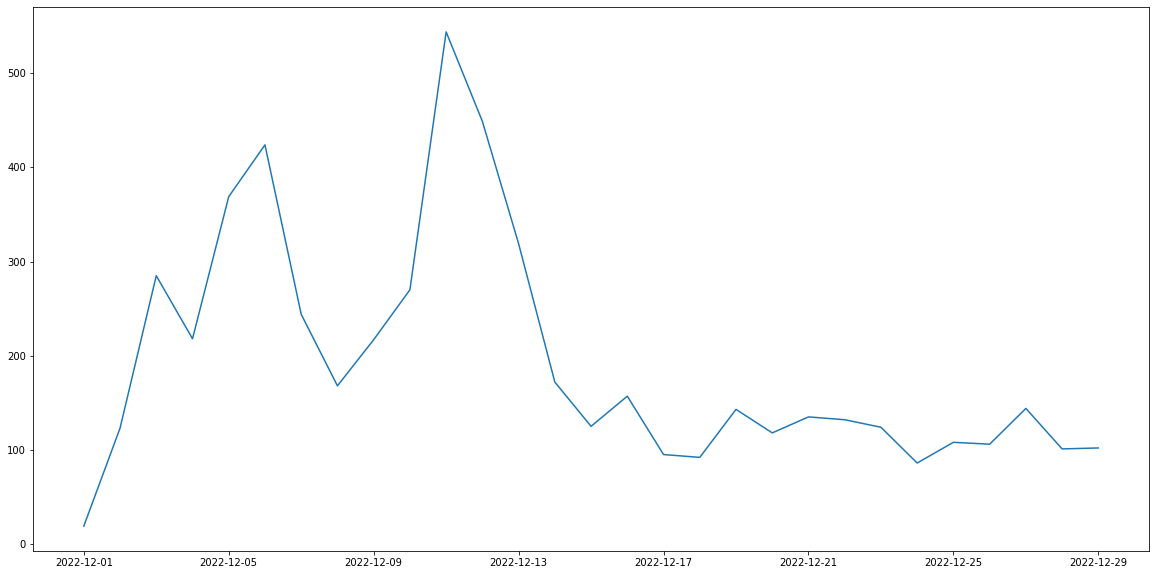

In [25]:
%matplotlib inline

df['OnlyDate'].value_counts().plot(figsize=(20,10))

In [28]:
duplicate = df[df.duplicated("Tweet")]
duplicate

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,URL,OnlyDate
108,1608219944541462535,2022-12-28 21:54:48+00:00,Ohio1866,@dayiekonomi Abi bu ChatGpt hangisini indirece...,0,0,0,0,https://twitter.com/Ohio1866/status/1608219944...,2022-12-28
351,1607498117385003009,2022-12-26 22:06:31+00:00,matilizm,ChatGPT ile Yapay Zeka Felsefesi: İnsan Olmak ...,0,0,0,0,https://twitter.com/matilizm/status/1607498117...,2022-12-26
1856,1602997068397690881,2022-12-14 12:00:58+00:00,MaksatBilgiCom,Chat GPT Nedir? Ne İşe Yarar? Özellikleri Nele...,0,0,0,0,https://twitter.com/MaksatBilgiCom/status/1602...,2022-12-14
2445,1602317651883294721,2022-12-12 15:01:12+00:00,TurkishIndy,"Yapay zeka ChatGPT'den gelecek senaryosu: ""İşs...",0,0,6,0,https://twitter.com/TurkishIndy/status/1602317...,2022-12-12
4557,1599958500700221440,2022-12-06 02:46:47+00:00,BharathPullodi,#ChatGPT is insane.,0,0,0,0,https://twitter.com/BharathPullodi/status/1599...,2022-12-06
4619,1599875326200332289,2022-12-05 21:16:16+00:00,devomer,Bizim sırt sırta verip yazamayacağımız kod yok...,6,30,664,1,https://twitter.com/devomer/status/15998753262...,2022-12-05


In [29]:
len(duplicate)

6

In [30]:
df_unique = df.drop_duplicates("Tweet")
df_unique

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,URL,OnlyDate
0,1608613358500220928,2022-12-29 23:58:05+00:00,ademmcansiz,ChatGPT ile vs atıyoruz olmuyor diyom hala anl...,0,0,3,0,https://twitter.com/ademmcansiz/status/1608613...,2022-12-29
1,1608585229756936192,2022-12-29 22:06:19+00:00,berkelevent,ChatGPT çıktı çıkalı Co-pilot’u da unuttuk..,0,0,0,0,https://twitter.com/berkelevent/status/1608585...,2022-12-29
2,1608581500060205057,2022-12-29 21:51:30+00:00,0xugurcaneser,Her türlü yazı işlerimi chatgpt yapıyor sağols...,0,0,0,0,https://twitter.com/0xugurcaneser/status/16085...,2022-12-29
3,1608580588247871488,2022-12-29 21:47:52+00:00,atiorh,@imTolstoyevski 2019 Haziran bölümlerinde yapa...,0,1,0,0,https://twitter.com/atiorh/status/160858058824...,2022-12-29
4,1608579005657272320,2022-12-29 21:41:35+00:00,nounpackage,Ben en güzel Siber Güvenlik muhabbetini ChatGP...,0,0,0,0,https://twitter.com/nounpackage/status/1608579...,2022-12-29
...,...,...,...,...,...,...,...,...,...,...
5584,1598294973857792000,2022-12-01 12:36:31+00:00,DigitalReportTR,OpenAI’ın yeni chat robotu ChatGPT tanıtıldı\n...,0,1,1,0,https://twitter.com/DigitalReportTR/status/159...,2022-12-01
5585,1598294149585047558,2022-12-01 12:33:14+00:00,venividi_trade,Yapay zeka üzerine araştırmalar yapan @OpenAI ...,5,3,14,1,https://twitter.com/venividi_trade/status/1598...,2022-12-01
5586,1598293316843737088,2022-12-01 12:29:56+00:00,yigitkonur,Bugün mutlu musunuz? Biraz daha depresif hisse...,10,24,319,7,https://twitter.com/yigitkonur/status/15982933...,2022-12-01
5587,1598288040052502528,2022-12-01 12:08:58+00:00,kisalar,Öykülerin tam da oturmuyor olmasının sebebi be...,1,0,0,0,https://twitter.com/kisalar/status/15982880400...,2022-12-01


In [31]:
#df_unique.to_csv("data/deprem_hashtag_subat_2023_unique.csv")
df_unique.to_csv("data/chatgpt_2022-11-30_2022-12-30_unique.csv")